In [36]:
import numpy as np # linear algebra
import pandas as pd 
from matplotlib import pyplot as plt

In [37]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')


In [38]:
data =np.array(data)
m , n = data.shape
np.random.shuffle(data)

data_dev= data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev/255. 

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255.
_,m_train = X_train.shape

In [39]:
Y_train

array([0, 3, 2, ..., 5, 4, 9])

In [40]:
def init_params():
    W1 = np.random.rand(10,784)-0.5
    B1 = np.random.rand(10,1)-0.5
    W2 = np.random.rand(10,10)-0.5
    B2 = np.random.rand(10,1)-0.5
    return W1,B1,W2,B2

def Relu(Z):
    return np.maximum(Z,0)



def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A


def forward_prop(W1,B1,W2,B2,X):
    Z1 = W1.dot(X)+B1
    A1 = Relu(Z1)
    Z2 = W2.dot(A1)+B2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def Relu_deriv(Z):
    return Z>0

def back_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m* dZ2.dot(A1.T)
    dB2 = 1/m* np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * Relu_deriv(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    dB1 = 1/m* np.sum(dZ1)
    return dW1,dB1,dW2,dB2

def update_params(W1,B1,W2,B2,dW1,dB1,dW2,dB2,alpha):
    W1 = W1- alpha*dW1
    B1 = B1- alpha*dB1
    W2 = W2- alpha*dW2
    B2 = B2- alpha*dB2
    return W1,B1,W2,B2
    
    

In [41]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions,Y):
    print(predictions , Y)
    return np.sum(predictions == Y)/Y.size


def gradient_descent(X,Y,iterations,alpha):
    W1,B1,W2,B2 = init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2 =forward_prop(W1,B1,W2,B2,X)
        dW1,dB1,dW2,dB2 = back_prop(Z1,A1,Z2,A2,W1,W2,X,Y)
        W1,B1,W2,B2 = update_params(W1,B1,W2,B2,dW1,dB1,dW2,dB2,alpha)
        if i % 10 == 0:
            print("Iteration:",i)
            print("Accuracy:",get_accuracy(get_predictions(A2),Y))
    return W1,B1,W2,B2

In [42]:
W1,B1,W2,B2 = gradient_descent(X_train,Y_train,500,0.10)

Iteration: 0
[7 1 1 ... 1 1 1] [0 3 2 ... 5 4 9]
Accuracy: 0.07663414634146341
Iteration: 10
[8 8 6 ... 1 8 6] [0 3 2 ... 5 4 9]
Accuracy: 0.19982926829268294
Iteration: 20
[8 9 7 ... 1 4 6] [0 3 2 ... 5 4 9]
Accuracy: 0.33834146341463417
Iteration: 30
[8 3 7 ... 1 9 6] [0 3 2 ... 5 4 9]
Accuracy: 0.4205121951219512
Iteration: 40
[8 3 7 ... 4 9 6] [0 3 2 ... 5 4 9]
Accuracy: 0.48217073170731706
Iteration: 50
[8 3 7 ... 4 9 6] [0 3 2 ... 5 4 9]
Accuracy: 0.5295609756097561
Iteration: 60
[8 3 7 ... 4 4 6] [0 3 2 ... 5 4 9]
Accuracy: 0.5684634146341463
Iteration: 70
[0 3 7 ... 4 4 6] [0 3 2 ... 5 4 9]
Accuracy: 0.6009512195121951
Iteration: 80
[0 3 7 ... 4 4 6] [0 3 2 ... 5 4 9]
Accuracy: 0.6270975609756098
Iteration: 90
[0 3 7 ... 4 4 4] [0 3 2 ... 5 4 9]
Accuracy: 0.649219512195122
Iteration: 100
[0 3 7 ... 4 4 4] [0 3 2 ... 5 4 9]
Accuracy: 0.6685609756097561
Iteration: 110
[0 3 4 ... 4 4 4] [0 3 2 ... 5 4 9]
Accuracy: 0.6850975609756098
Iteration: 120
[0 3 4 ... 4 4 4] [0 3 2 ... 5 4 

In [51]:
def make_prediction(X,W1,B1,W2,B2):
    _,_,_,A2 = forward_prop(W1,B1,W2,B2,X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index,W1,B1,W2,B2):
    current_image = X_train[:,index,None]
    prediction = make_prediction(current_image,W1,B1,W2,B2)
    label = Y_train[index]
    print("Prediction:",prediction)
    print("Label:",label)
    
    current_image = current_image.reshape((28,28))*255
    plt.gray()
    plt.imshow(current_image,interpolation='nearest')
    plt.show()

Prediction: [0]
Label: 0


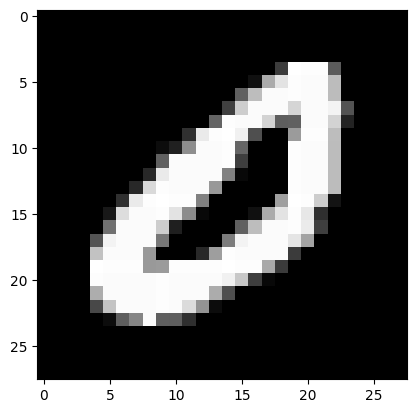

Prediction: [3]
Label: 3


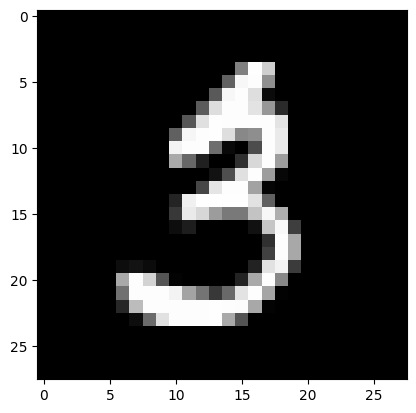

Prediction: [6]
Label: 6


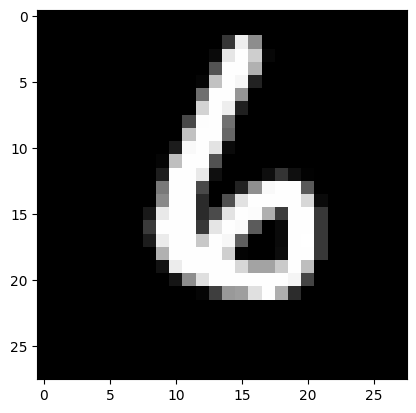

Prediction: [5]
Label: 5


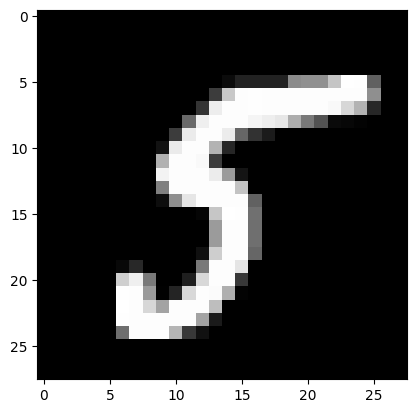

Prediction: [8]
Label: 8


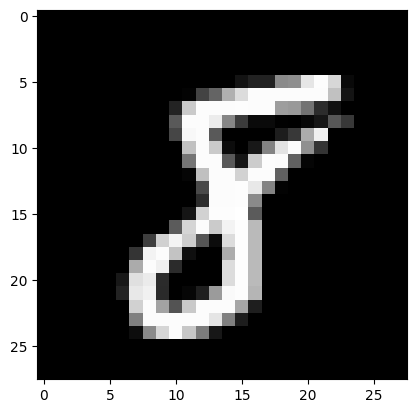

In [53]:
test_prediction(0,W1,B1,W2,B2)
test_prediction(1,W1,B1,W2,B2)
test_prediction(21,W1,B1,W2,B2)
test_prediction(3,W1,B1,W2,B2)
test_prediction(347,W1,B1,W2,B2)